In [2]:
import h5py
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import time


In [3]:

# start_load = time.time()

# 1) 스타일→인덱스 매핑
style_list = [
    'Impressionism',
    'Realism',
    'Romanticism',
    'Expressionism',
    'Post-Impressionism',
    'Art Nouveau (Modern)',
    'Baroque'                # If top 7
]
style2idx = {s: i for i, s in enumerate(style_list)}

# 2) HDF5 전체 로드
h5_path = '/home/work/workspace_ai/Artificlass/data_process/data/top7_h5_512.h5'
with h5py.File(h5_path, 'r') as f:
    # (N, 3, 256, 256) uint8 → float32 [0,1]
    imgs_np = f['images'][:] .astype(np.float32) / 255.0
    # 문자열 array of bytes or str
    styles_h5 = f['style'][:]  
    title_h5 = f['title'][:]

In [4]:
np.shape(imgs_np)

(30800, 3, 512, 512)

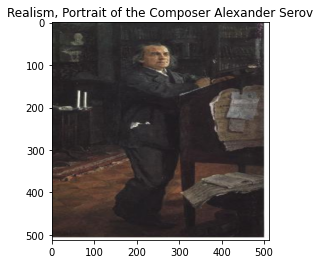

In [5]:
import matplotlib.pyplot as plt

sample_idx = 5
plt.imshow(imgs_np[sample_idx].transpose(1, 2, 0))
plt.title(f"{styles_h5[sample_idx]}, {title_h5[sample_idx]}")
plt.show()